In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [11]:
df = pd.read_csv('../../Machine_Learning/tested.csv', usecols=['Age', 'Fare', 'Survived'])

In [14]:
df.dropna(inplace = True)

In [15]:
df.shape

(331, 3)

In [16]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [17]:
X = df.iloc[: , 1:]
y = df.iloc[: , 0]

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train.head(2)

,Age,Fare
281,0.75,13.775
96,76.00,78.850


In [20]:
clf = DecisionTreeClassifier()

In [21]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [22]:
accuracy_score(y_test,y_pred)

0.5970149253731343

In [23]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.5650623885918004

## In quantile binning each interval contains same no. of items/peoples [same frequency]
## intervals are non-uniform like (3-8), (10,12), (15,24)

In [24]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [25]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [26]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [27]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.33      , 13.53333333, 18.        , 20.        , 22.        ,
              24.        , 25.2       , 27.73333333, 30.        , 32.        ,
              36.        , 39.        , 43.8       , 47.93333333, 55.        ,
              76.        ])                                                   ],
      dtype=object)

In [29]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [31]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [32]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
114,63.0,14.0,221.7792,14.0,"(55.0, 76.0]","(141.325, 512.329]"
13,63.0,14.0,26.0000,9.0,"(55.0, 76.0]","(21.0, 26.0]"
2,62.0,14.0,9.6875,4.0,"(55.0, 76.0]","(8.662, 12.253]"
412,28.0,7.0,7.7750,1.0,"(27.733, 30.0]","(7.426, 7.778]"
404,43.0,11.0,27.7208,10.0,"(39.0, 43.8]","(26.0, 27.721]"


In [33]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [34]:
accuracy_score(y_test, y_pred2)

0.5970149253731343

In [35]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

0.5681818181818181

In [36]:
def discretize(bins, strategy):
    kbin_age = KBinsDiscretizer(n_bins = bins, encode='ordinal', strategy= strategy)
    kbin_fare = KBinsDiscretizer(n_bins = bins, encode='ordinal', strategy= strategy)

    trf = ColumnTransformer([
        ('first', kbin_age, [0]),
        ('second', kbin_fare, [1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:, 0], color='red')
    plt.title("After")

    plt.show()
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:, 1], color='red')
    plt.show()

0.5712121212121213


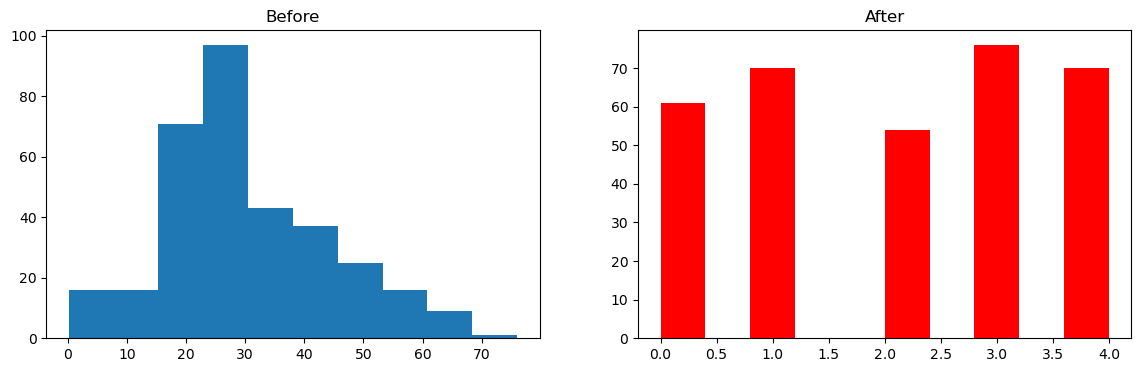

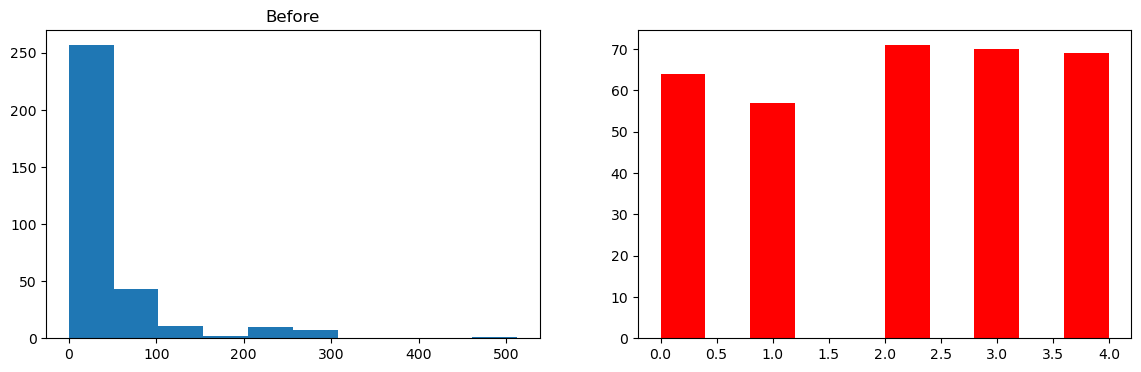

In [38]:
# discretize(5, 'kmeans')
discretize(5, 'quantile')